<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pradedamas mokymas (išvesta kas 2000 iteracijų)...
Iteracija 0, Loss: 0.5042
Iteracija 2000, Loss: 0.4996
Iteracija 4000, Loss: 0.4776
Iteracija 6000, Loss: 0.3453
Iteracija 8000, Loss: 0.2417
Iteracija 10000, Loss: 0.1797
Iteracija 12000, Loss: 0.1403
Iteracija 14000, Loss: 0.1137
Iteracija 16000, Loss: 0.0948
Iteracija 18000, Loss: 0.0808


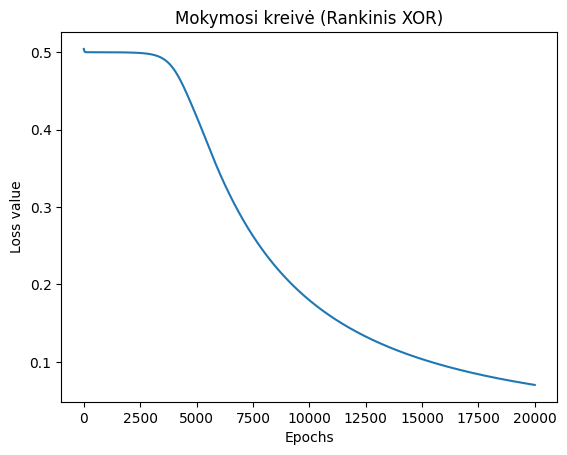


Galutiniai spėjimai:
[[0.12081272 0.81642502 0.81642919 0.24157777]]


In [1]:
# --- 1 Dalis: Rankinis neuroninio tinklo kūrimas (XOR uždavinys) ---

import numpy as np
import matplotlib.pyplot as plt

# 1. Duomenų paruošimas (XOR)
a = np.array([0, 0, 1, 1])
b = np.array([0, 1, 0, 1])
x = np.array([a, b])  # Įėjimas
y_true = np.array([[0, 1, 1, 0]]) # Teisingas atsakymas (XOR logika)

# 2. Aktyvacijos funkcija
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# 3. Inicijuojame svorius (Random seed užtikrina, kad rezultatai kartotųsi)
np.random.seed(42)
input_neurons = 2
hidden_neurons = 2
output_neurons = 1
lr = 0.1 # Mokymosi greitis

w1 = np.random.rand(hidden_neurons, input_neurons)
w2 = np.random.rand(output_neurons, hidden_neurons)

# 4. Funkcijos sklidimui pirmyn ir atgal
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    y_pred = sigmoid(z2)
    return z1, a1, z2, y_pred

def back_prop(w1, w2, z1, a1, z2, y_pred, y_true):
    # Klaida išėjimo sluoksnyje
    dz2 = (y_pred - y_true) * y_pred * (1 - y_pred)
    dw2 = np.dot(dz2, a1.T)

    # Klaida paslėptame sluoksnyje
    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot(dz1, x.T)

    return dw2, dw1

# 5. Mokymo ciklas
losses = []
iterations = 20000

print("Pradedamas mokymas (išvesta kas 2000 iteracijų)...")
for i in range(iterations):
    # Forward
    z1, a1, z2, y_pred = forward_prop(w1, w2, x)

    # Loss (Klaida)
    loss = 0.5 * np.sum((y_true - y_pred) ** 2)
    losses.append(loss)

    # Backward (Gradientai)
    dw2, dw1 = back_prop(w1, w2, z1, a1, z2, y_pred, y_true)

    # Update Weights
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1

    if i % 2000 == 0:
        print(f"Iteracija {i}, Loss: {loss:.4f}")

# 6. Rezultatų vizualizacija
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.title("Mokymosi kreivė (Rankinis XOR)")
plt.show()

print("\nGalutiniai spėjimai:")
print(y_pred)

Mokymo duomenų forma: (4, 2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)


Mokomas Keras modelis...
Mokymas baigtas.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Prognozės (tikimybės):
[[0.02424948]
 [0.81229323]
 [0.98854417]
 [0.00830588]]

Prognozės (suapvalintos):
[[0.]
 [1.]
 [1.]
 [0.]]


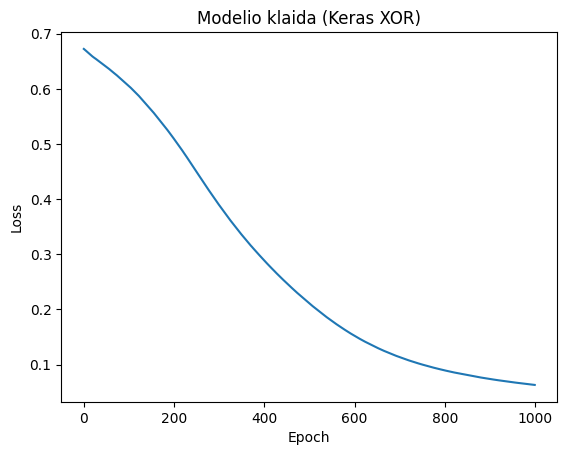

In [3]:
# --- 2 Dalis: Paprastas tinklas su Keras (XOR uždavinys) ---

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. Duomenų paruošimas (sutvarkytas formatas Keras modeliui)
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

print(f"Mokymo duomenų forma: {x_train.shape}")

# 2. Modelio kūrimas
model = keras.Sequential([
    layers.InputLayer(shape=(2,)),       # 2 įėjimai
    layers.Dense(10, activation="relu", name="layer1"),
    layers.Dense(10, activation="relu", name="layer2"),
    layers.Dense(1, activation="sigmoid", name="output") # 1 išėjimas (0 arba 1)
])

model.summary()

# 3. Kompiliavimas
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["binary_accuracy"])

# 4. Mokymas
print("\nMokomas Keras modelis...")
history = model.fit(x_train, y_train, epochs=1000, verbose=0)
print("Mokymas baigtas.")

# 5. Prognozavimas
predictions = model.predict(x_train)
print("\nPrognozės (tikimybės):")
print(predictions)

print("\nPrognozės (suapvalintos):")
print(predictions.round())

# 6. Klaidos grafikas
plt.plot(history.history['loss'])
plt.title('Modelio klaida (Keras XOR)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [4]:
# --- 3 Dalis: Namų darbai (Homework 2 - OR/AND) ---

# AND duomenys
x_hw = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_hw_and = np.array([[0], [0], [0], [1]]) # Tik 1 ir 1 duoda 1

# OR duomenys (jei norite išbandyti)
# y_hw_or = np.array([[0], [1], [1], [1]])

# Modelis (užtenka paprastesnio, be paslėptų sluoksnių, nes AND/OR yra tiesiškai atskiriami)
model_hw = keras.Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(1, activation="sigmoid") # Perceptronas
])

model_hw.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                 loss="binary_crossentropy",
                 metrics=["binary_accuracy"])

print("Mokomas AND modelis...")
model_hw.fit(x_hw, y_hw_and, epochs=500, verbose=0)

print("\nAND Prognozės:")
print(model_hw.predict(x_hw).round())

Mokomas AND modelis...

AND Prognozės:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.]
 [0.]
 [0.]
 [1.]]


In [5]:
# --- 4 Dalis: Skaičiavimo patikrinimas ---
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

y_true = 1
lr = 0.1

# Įėjimai ir svoriai
x = np.array([0.5, -0.2, 0.15])
w = np.array([0.2, 2.0, 0.1])
b = 1

# Forward
net = np.dot(x, w) + b
print(f"Net (suma): {net}")

y_pred = sigmoid(net)
print(f"Prediction (y_pred): {y_pred}")

# Loss
loss = 0.5 * ((y_true - y_pred) ** 2)
print(f"Loss: {loss}")

# Backprop (vieno svorio atnaujinimas)
# Klaidos gradientas
neuron_error = (y_pred - y_true) * y_pred * (1 - y_pred)
print(f"Neuron error: {neuron_error}")

# Atnaujiname w1 (pirmąjį svorį)
w1_new = w[0] - lr * neuron_error * x[0]
print(f"New w1: {w1_new}")

Net (suma): 0.715
Prediction (y_pred): 0.6715050342254059
Loss: 0.05395447126962589
Neuron error: -0.07246139815304763
New w1: 0.2036230699076524
